In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
#ignoring the wrangings
warnings.filterwarnings('ignore')

# Importing data 

In [277]:
df_rating=pd.read_csv(r"C:\Users\mohamed\Downloads\data\ratings.dat",sep = '::', engine='python')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [278]:
df_rating.shape

(1000208, 4)

In [279]:
df_movie=pd.read_csv(r'C:\Users\mohamed\Downloads\data\movies.dat',encoding='ISO-8859-1',sep = '::', engine='python')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [280]:
df_movie.shape

(3882, 3)

In [281]:
df_users=pd.read_csv(r"C:\Users\mohamed\Downloads\data\users.dat",sep='::',engine='python')
df_users.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [282]:
data=pd.concat([df_movie,df_rating,df_users],axis=1)

In [283]:
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [284]:
data.tail()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
1000203,NaN,NaN,NaN,6040,1091,1,956716541,NaN,NaN,NaN,NaN,NaN
1000204,NaN,NaN,NaN,6040,1094,5,956704887,NaN,NaN,NaN,NaN,NaN
1000205,NaN,NaN,NaN,6040,562,5,956704746,NaN,NaN,NaN,NaN,NaN
1000206,NaN,NaN,NaN,6040,1096,4,956715648,NaN,NaN,NaN,NaN,NaN
1000207,NaN,NaN,NaN,6040,1097,4,956715569,NaN,NaN,NaN,NaN,NaN


# Cleaning data

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000208 entries, 0 to 1000207
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieIDs    3882 non-null     float64
 1   MovieName   3882 non-null     object 
 2   Category    3882 non-null     object 
 3   ID          1000208 non-null  int64  
 4   MovieID     1000208 non-null  int64  
 5   Ratings     1000208 non-null  int64  
 6   TimeStamp   1000208 non-null  int64  
 7   UserID      6039 non-null     float64
 8   Gender      6039 non-null     object 
 9   Age         6039 non-null     float64
 10  Occupation  6039 non-null     float64
 11  Zip-code    6039 non-null     object 
dtypes: float64(4), int64(4), object(4)
memory usage: 91.6+ MB


In [286]:
data.isna().sum()

MovieIDs      996326
MovieName     996326
Category      996326
ID                 0
MovieID            0
Ratings            0
TimeStamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

In [287]:
data.shape

(1000208, 12)

In [288]:
data.dropna(inplace=True)

In [289]:
data.isna().sum()

MovieIDs      0
MovieName     0
Category      0
ID            0
MovieID       0
Ratings       0
TimeStamp     0
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [290]:
data.shape

(3882, 12)

In [291]:
Int_columns=['Age','Occupation','MovieIDs']
data[Int_columns]=data[Int_columns].astype('int')

In [292]:
id_1=(data['ID']==1)
data[id_1].head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56,16,70072
1,3,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25,15,55117
2,4,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45,7,02460
3,5,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25,20,55455
4,6,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50,9,55117


In [293]:
data[id_1].shape

(52, 12)

In [294]:
id_2=(data['ID']==2)
data[id_2].head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
52,54,"Big Green, The (1995)",Children's|Comedy,2,1357,5,978298709,54.0,M,50,1,56723
53,55,Georgia (1995),Drama,2,3068,4,978299000,55.0,F,35,12,55303
54,56,Kids of the Round Table (1995),Adventure|Children's|Fantasy,2,1537,4,978299620,56.0,M,35,20,60440
55,57,Home for the Holidays (1995),Drama,2,647,3,978299351,57.0,M,18,19,30350
56,58,"Postino, Il (The Postman) (1994)",Drama|Romance,2,2194,4,978299297,58.0,M,25,2,30303


In [295]:
data[id_2].shape

(129, 12)

Each ID has a group of movies 

In [296]:
data=data.rename(columns={'ID':'GroupID'})

In [297]:
data=data.drop('MovieID',axis=1)

In [298]:
data.head()

,MovieIDs,MovieName,Category,GroupID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2,Jumanji (1995),Adventure|Children's|Fantasy,1,3,978302109,2.0,M,56,16,70072
1,3,Grumpier Old Men (1995),Comedy|Romance,1,3,978301968,3.0,M,25,15,55117
2,4,Waiting to Exhale (1995),Comedy|Drama,1,4,978300275,4.0,M,45,7,02460
3,5,Father of the Bride Part II (1995),Comedy,1,5,978824291,5.0,M,25,20,55455
4,6,Heat (1995),Action|Crime|Thriller,1,3,978302268,6.0,F,50,9,55117


Now the data is ready to analysis 

# Exploratory data analysis

In [299]:
data.describe(include='all')

,MovieIDs,MovieName,Category,GroupID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
count,3882.000000,3882,3882,3882.000000,3882.000000,3.882000e+03,3882.000000,3882,3882.000000,3882.000000,3882
unique,NaN,3882,301,NaN,NaN,NaN,NaN,2,NaN,NaN,2457
top,NaN,Jumanji (1995),Drama,NaN,NaN,NaN,NaN,M,NaN,NaN,48104
freq,NaN,1,843,NaN,NaN,NaN,NaN,2829,NaN,NaN,19
mean,1986.560793,NaN,NaN,16.150696,3.561566,9.785892e+08,1942.500000,NaN,30.436888,8.206852,NaN
std,1146.483260,NaN,NaN,7.468681,1.095514,2.281786e+06,1120.781201,NaN,13.055439,6.331577,NaN
min,2.000000,NaN,NaN,1.000000,1.000000,9.781252e+08,2.000000,NaN,1.000000,0.000000,NaN
25%,983.250000,NaN,NaN,10.000000,3.000000,9.781535e+08,972.250000,NaN,25.000000,3.000000,NaN
50%,2010.500000,NaN,NaN,18.000000,4.000000,9.782245e+08,1942.500000,NaN,25.000000,7.000000,NaN
75%,2980.750000,NaN,NaN,23.000000,4.000000,9.782976e+08,2912.750000,NaN,35.000000,14.000000,NaN


The average of ratings is 3.56 and the median is 4 

## Correlation

In [300]:
data.corr()

,MovieIDs,GroupID,Ratings,TimeStamp,UserID,Age,Occupation
MovieIDs,1.000000,0.991045,-0.152805,0.072239,0.999944,-0.005678,0.003494
GroupID,0.991045,1.000000,-0.150231,0.071662,0.990238,-0.002821,0.005656
Ratings,-0.152805,-0.150231,1.000000,-0.008594,-0.153069,-0.016888,-0.001186
TimeStamp,0.072239,0.071662,-0.008594,1.000000,0.071654,0.018344,-0.008354
UserID,0.999944,0.990238,-0.153069,0.071654,1.000000,-0.006320,0.003343
Age,-0.005678,-0.002821,-0.016888,0.018344,-0.006320,1.000000,0.075323
Occupation,0.003494,0.005656,-0.001186,-0.008354,0.003343,0.075323,1.000000


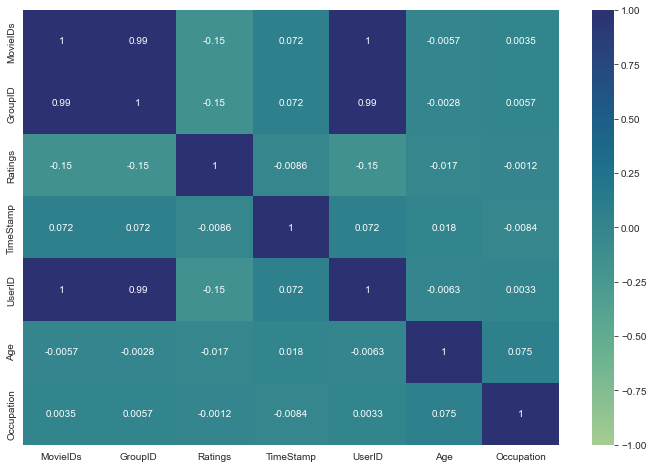

In [301]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1, cmap="crest")
plt.show()

MovieIDs and GroupID and UserID have a strong relationships

### Gender

In [302]:
gender=data['Gender'].value_counts()
gender

M    2829
F    1053
Name: Gender, dtype: int64

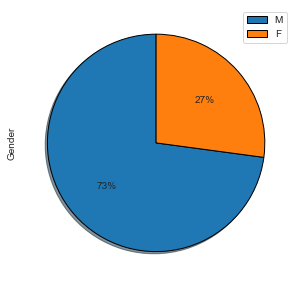

In [303]:
plt.figure(figsize=(5,5))
gender.plot(kind='pie',shadow=True,wedgeprops={'edgecolor':'black'},autopct="%1.0f%%",labels=None,startangle=90)
plt.legend(labels=gender.index,loc='upper right')
plt.show()

Porportions of viewers are 73% Males and 27% Females

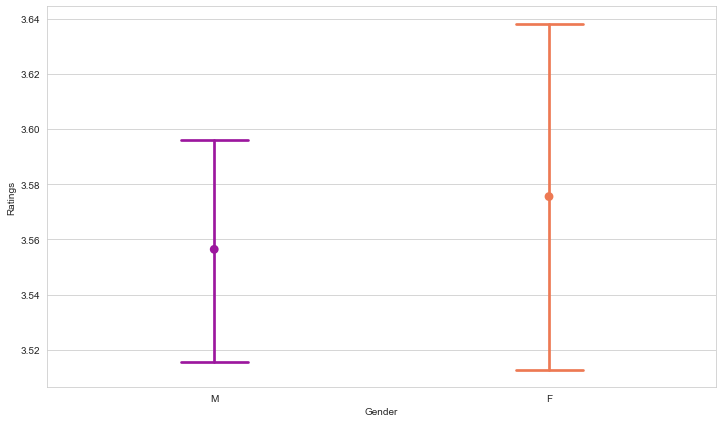

In [304]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.pointplot(data=data,x='Gender',y='Ratings',palette='plasma',capsize=0.2)
plt.show()

### Age

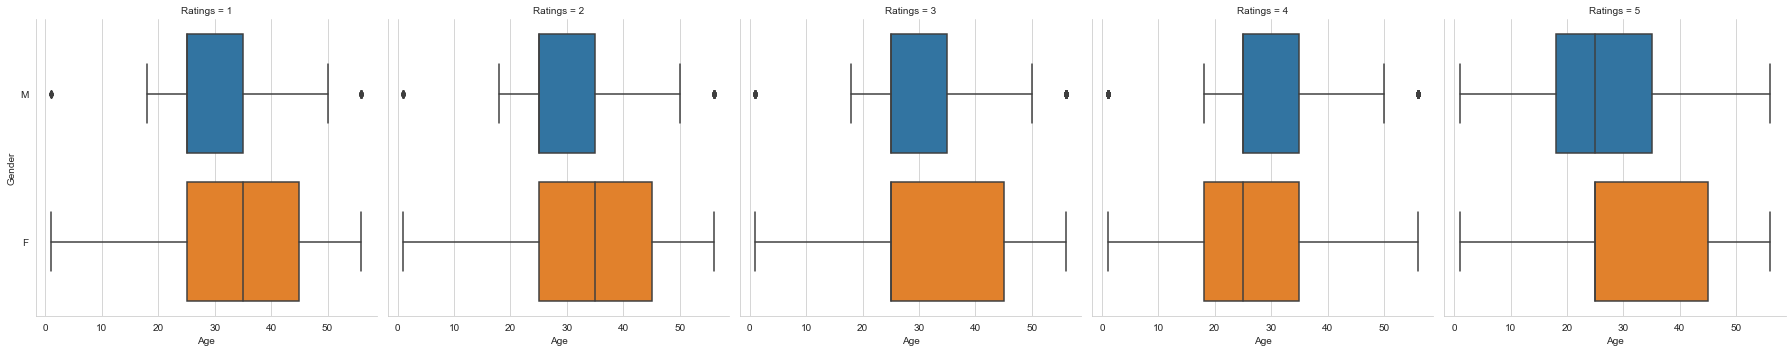

In [362]:

sns.catplot(kind='box',data=data,x='Age',y='Gender',col='Ratings')
plt.show()

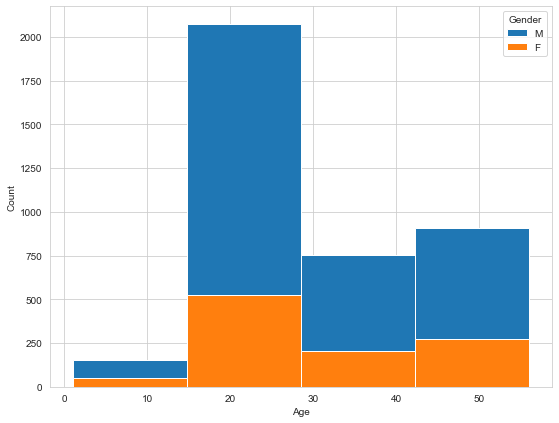

In [306]:
plt.figure(figsize=(9,7))
sns.histplot(data=data,x='Age',bins=4,hue='Gender',multiple='stack',alpha=1)
plt.show()

In [307]:
#Binding the ages to classes
labels=['Children','Teenager','Youth','Elderly','Old']
bins=[0,9,18,35,50,data['Age'].max()]
data['Person']=pd.cut(data['Age'],bins=bins,labels=labels)

In [308]:
data[['Person','Age']].head(10)

,Person,Age
0,Old,56
1,Youth,25
2,Elderly,45
3,Youth,25
4,Elderly,50
5,Youth,35
6,Youth,25
7,Youth,25
8,Youth,35
9,Youth,25


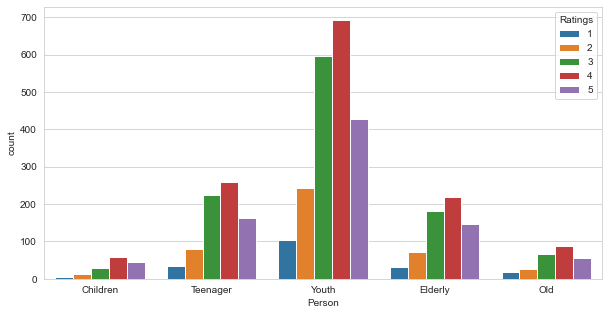

In [359]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='Person',hue='Ratings')
plt.show()

More than 2000 viewers are youths and 695 of them make rating 4!!

In [310]:
person_gender=data.groupby('Person')['Gender'].value_counts()
person_gender=person_gender.unstack()

In [311]:
person_gender.head()

Gender,F,M
Person,,
Children,48,103
Teenager,193,567
Youth,541,1523
Elderly,203,449
Old,68,187


In [312]:
pvt=data.pivot_table(index='Person',columns='Gender',values='Ratings',aggfunc='mean')
pvt.head()

Gender,F,M
Person,,
Children,3.750000,3.844660
Teenager,3.626943,3.559083
Youth,3.573013,3.520683
Elderly,3.546798,3.594655
Old,3.411765,3.588235


### GroupID

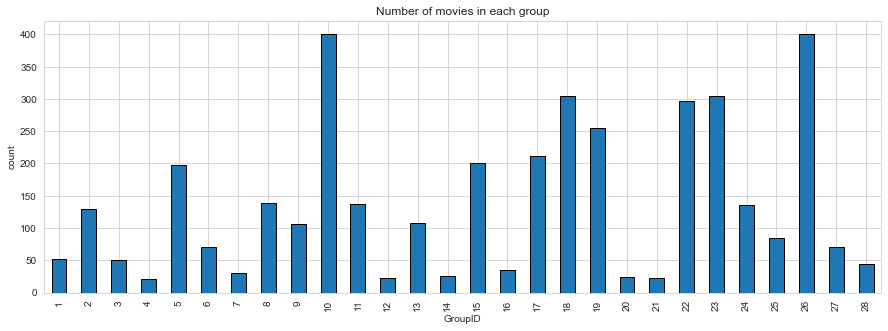

In [313]:
plt.figure(figsize=(15,5))
idgroup=data.groupby('GroupID')['MovieIDs'].count()
idgroup.plot(kind='bar',edgecolor='black')
plt.title("Number of movies in each group")
plt.ylabel('count')
plt.show()

### Ratings

In [314]:
data['Ratings'].value_counts()

4    1318
3    1099
5     840
2     432
1     193
Name: Ratings, dtype: int64

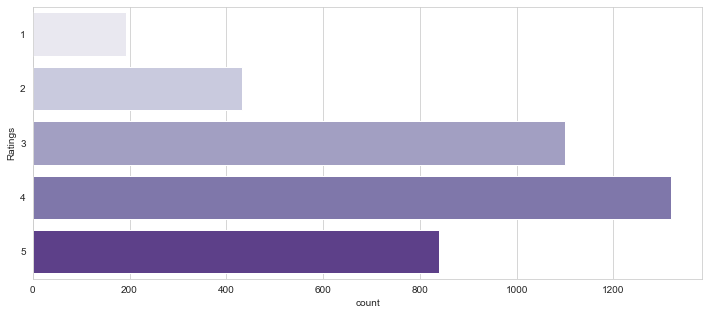

In [315]:
plt.figure(figsize=(12,5))
sns.countplot(data=data,y='Ratings',palette='Purples')
plt.show()

In [316]:
data['Ratings'].describe()

count    3882.000000
mean        3.561566
std         1.095514
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Ratings, dtype: float64

### Category

In [317]:
data.Category.value_counts()

Drama                              843
Comedy                             521
Horror                             178
Comedy|Drama                       162
Comedy|Romance                     142
                                  ... 
Action|Comedy|Sci-Fi|War             1
Action|Romance|War                   1
Action|Drama|Thriller|War            1
Action|Adventure|Children's          1
Adventure|Crime|Sci-Fi|Thriller      1
Name: Category, Length: 301, dtype: int64

### MovieName

In [318]:
high_rate_movies=data[['MovieName','Category','Ratings']]
high_rate_movies=high_rate_movies.sort_values('Ratings',ascending=False)

Highest 20 movies rating :

In [319]:
high_rate_movies.head(20)

,MovieName,Category,Ratings
1941,Back to the Future Part II (1989),Comedy|Sci-Fi,5
2018,Popeye (1980),Adventure|Comedy|Musical,5
2019,"Rescuers Down Under, The (1990)",Animation|Children's,5
684,"Substitute, The (1996)",Action,5
686,Butterfly Kiss (1995),Thriller,5
687,Feeling Minnesota (1996),Drama|Romance,5
1258,Night on Earth (1991),Comedy|Drama,5
689,To Cross the Rubicon (1991),Drama,5
2021,Return from Witch Mountain (1978),Children's|Sci-Fi,5
2027,Something Wicked This Way Comes (1983),Children's|Horror,5


In [320]:
low_rate_movies=data[['MovieName','Category','Ratings']]
low_rate_movies=low_rate_movies.sort_values('Ratings',ascending=True)

lowest 20 movies rating :

In [321]:
low_rate_movies.head(20)

,MovieName,Category,Ratings
2828,"Dark Half, The (1993)",Horror|Mystery,1
313,"Santa Clause, The (1994)",Children's|Comedy|Fantasy,1
2061,Autumn Sonata (Höstsonaten ) (1978),Drama,1
2817,Simon Sez (1999),Drama,1
1200,Psycho (1960),Horror|Thriller,1
2889,Fight Club (1999),Drama,1
2890,Beefcake (1999),Drama,1
2049,Maximum Overdrive (1986),Horror,1
1248,Arsenic and Old Lace (1944),Comedy|Mystery|Thriller,1
2046,"Lord of the Rings, The (1978)",Adventure|Animation|Children's|Sci-Fi,1


### Occupation

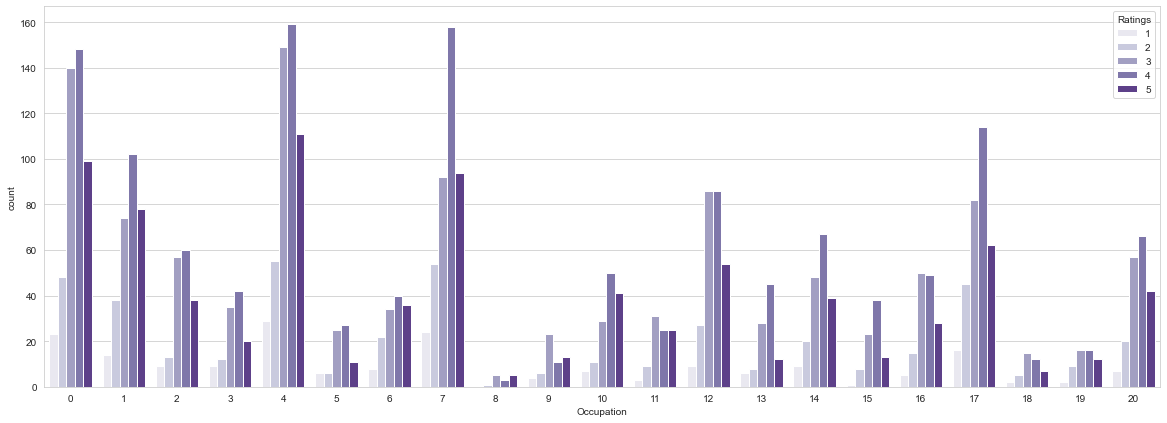

In [322]:
plt.figure(figsize=(20,7))
sns.countplot(data=data,x='Occupation',hue='Ratings',palette='Purples')
plt.show()

# Model building

In [323]:
df_final=data[['MovieIDs','Age','Gender','Occupation','Ratings']]

In [324]:
df_final=pd.get_dummies(df_final,columns=['Gender'])

In [325]:
df_final.head()

,MovieIDs,Age,Occupation,Ratings,Gender_F,Gender_M
0,2,56,16,3,0,1
1,3,25,15,3,0,1
2,4,45,7,4,0,1
3,5,25,20,5,0,1
4,6,50,9,3,1,0


In [326]:
y=data[['Ratings']]
x=df_final.drop(['Ratings'],axis=1)
x.head()

,MovieIDs,Age,Occupation,Gender_F,Gender_M
0,2,56,16,0,1
1,3,25,15,0,1
2,4,45,7,0,1
3,5,25,20,0,1
4,6,50,9,1,0


In [327]:
y.head()

,Ratings
0,3
1,3
2,4
3,5
4,3


In [328]:
sts=StandardScaler()

In [329]:
x=pd.DataFrame(sts.fit_transform(x),columns=x.columns)
x.head()

,MovieIDs,Age,Occupation,Gender_F,Gender_M
0,-1.731221,1.958295,1.230997,-0.610095,0.610095
1,-1.730349,-0.416500,1.073038,-0.610095,0.610095
2,-1.729477,1.115626,-0.190633,-0.610095,0.610095
3,-1.728604,-0.416500,1.862832,-0.610095,0.610095
4,-1.727732,1.498658,0.125285,1.639088,-1.639088


In [330]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Model training

In [353]:
random_forest_model = RandomForestClassifier(n_estimators=50,max_depth=16).fit(x_train,y_train)

In [354]:
ypred1=random_forest_model.predict(x_train)

In [355]:
print(accuracy_score(ypred1,y_train))

0.9729468599033816


In [356]:
ypred2=random_forest_model.predict(x_test)

In [357]:
print(accuracy_score(ypred2,y_test))

0.3153153153153153


In [358]:
print(f'Random Forest algorithm accuracy is {np.round(accuracy_score(ypred2,y_test),2)*100} %')

Random Forest algorithm accuracy is 32.0 %
